# Store Sales - Time Series Forcasting
### Samuel Zamudio & Mendez

In [1]:
# import common libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import data
holidays_events_df = pd.read_csv('./holidays_events.csv')
oil_df = pd.read_csv('./oil.csv')
stores_df = pd.read_csv('./stores.csv')
test_df = pd.read_csv('./test.csv')
train_df = pd.read_csv('./train.csv')
transactions_df = pd.read_csv('./transactions.csv')


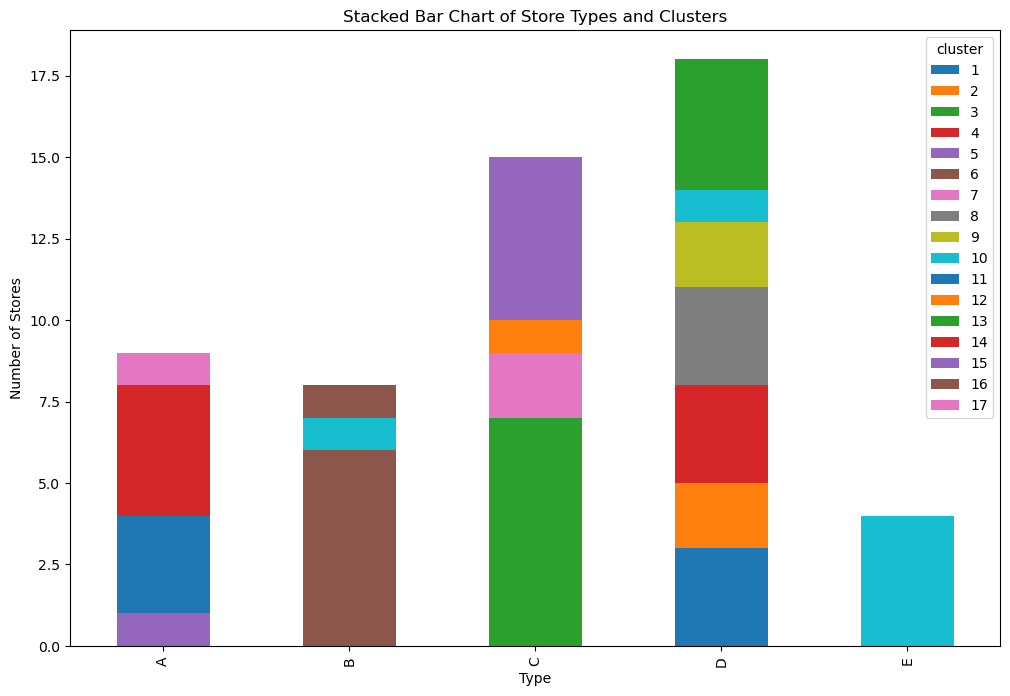

In [26]:
# Stacked bar chart
stacked_data = stores_df.groupby(['type', 'cluster']).size().unstack()
stacked_data.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Stacked Bar Chart of Store Types and Clusters')
plt.xlabel('Type')
plt.ylabel('Number of Stores')
plt.show()



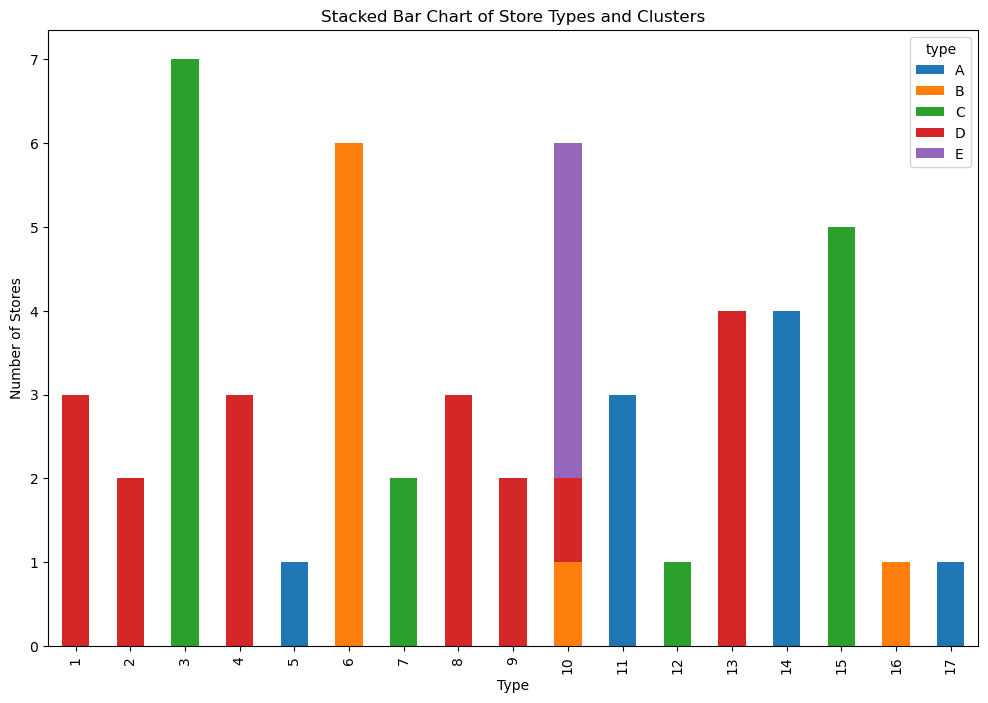

In [27]:
# Stacked bar chart
stacked_data = stores_df.groupby(['cluster', 'type']).size().unstack()
stacked_data.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Stacked Bar Chart of Store Types and Clusters')
plt.xlabel('Type')
plt.ylabel('Number of Stores')
plt.show()


In [3]:
train_df.duplicated().sum()

0

## Exploratory Data Analysis 

## Holiday Events

In [4]:
holidays_events_df.head(10)

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
5,2012-05-12,Holiday,Local,Puyo,Cantonizacion del Puyo,False
6,2012-06-23,Holiday,Local,Guaranda,Cantonizacion de Guaranda,False
7,2012-06-25,Holiday,Regional,Imbabura,Provincializacion de Imbabura,False
8,2012-06-25,Holiday,Local,Latacunga,Cantonizacion de Latacunga,False
9,2012-06-25,Holiday,Local,Machala,Fundacion de Machala,False


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [7]:
oil_df.head(10)

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
5,2013-01-08,93.21
6,2013-01-09,93.08
7,2013-01-10,93.81
8,2013-01-11,93.60
9,2013-01-14,94.27


## Data Preprocessing

In [8]:
holidays_events_df['description'].unique()

array(['Fundacion de Manta', 'Provincializacion de Cotopaxi',
       'Fundacion de Cuenca', 'Cantonizacion de Libertad',
       'Cantonizacion de Riobamba', 'Cantonizacion del Puyo',
       'Cantonizacion de Guaranda', 'Provincializacion de Imbabura',
       'Cantonizacion de Latacunga', 'Fundacion de Machala',
       'Fundacion de Santo Domingo', 'Cantonizacion de El Carmen',
       'Cantonizacion de Cayambe', 'Fundacion de Esmeraldas',
       'Primer Grito de Independencia', 'Fundacion de Riobamba',
       'Fundacion de Ambato', 'Fundacion de Ibarra',
       'Cantonizacion de Quevedo', 'Independencia de Guayaquil',
       'Traslado Independencia de Guayaquil', 'Dia de Difuntos',
       'Independencia de Cuenca', 'Provincializacion de Santo Domingo',
       'Provincializacion Santa Elena', 'Independencia de Guaranda',
       'Independencia de Latacunga', 'Independencia de Ambato',
       'Fundacion de Quito-1', 'Fundacion de Quito', 'Fundacion de Loja',
       'Navidad-4', 'Cantonizac

## Concatenate Train and Test Data

In [9]:
# Adding identifier columns
train_df['data_id'] = 'df1'
test_df['data_id'] = 'df2'

# Concatenating the DataFrames
combined_df = pd.concat([train_df, test_df], ignore_index=True)

In [10]:
combined_df.head(10)

,id,date,store_nbr,family,sales,onpromotion,data_id
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,df1
1,1,2013-01-01,1,BABY CARE,0.0,0,df1
2,2,2013-01-01,1,BEAUTY,0.0,0,df1
3,3,2013-01-01,1,BEVERAGES,0.0,0,df1
4,4,2013-01-01,1,BOOKS,0.0,0,df1
5,5,2013-01-01,1,BREAD/BAKERY,0.0,0,df1
6,6,2013-01-01,1,CELEBRATION,0.0,0,df1
7,7,2013-01-01,1,CLEANING,0.0,0,df1
8,8,2013-01-01,1,DAIRY,0.0,0,df1
9,9,2013-01-01,1,DELI,0.0,0,df1


In [11]:
combined_df.isna().sum()

id                 0
date               0
store_nbr          0
family             0
sales          28512
onpromotion        0
data_id            0
dtype: int64

In [12]:
# Casting to datetime
combined_df['date'] = pd.to_datetime(combined_df['date'])
print(combined_df.dtypes)

id                      int64
date           datetime64[ns]
store_nbr               int64
family                 object
sales                 float64
onpromotion             int64
data_id                object
dtype: object


In [13]:
# Make sure oil_df date is datetime type
oil_df['date'] = pd.to_datetime(oil_df['date'])
# Merging DataFrames on 'Date'
combined_df = combined_df.merge(oil_df, on='date', how='left')
combined_df.sample(10)

,id,date,store_nbr,family,sales,onpromotion,data_id,dcoilwtico
54225,54225,2013-01-31,30,CELEBRATION,0.000,0,df1,97.65
300057,300057,2013-06-18,28,LINGERIE,4.000,0,df1,98.46
2112975,2112975,2016-04-03,45,HOME CARE,1247.000,0,df1,NaN
239648,239648,2013-05-15,33,BEAUTY,1.000,0,df1,93.95
1396635,1396635,2015-02-25,46,DELI,547.969,2,df1,50.25
320640,320640,2013-06-29,6,GROCERY I,5152.000,0,df1,NaN
1867012,1867012,2015-11-16,44,BOOKS,0.000,0,df1,41.68
2106850,2106850,2016-03-31,23,SCHOOL AND OFFICE SUPPLIES,0.000,0,df1,36.94
2681233,2681233,2017-02-17,4,HOME AND KITCHEN II,13.000,2,df1,53.41
2582230,2582230,2016-12-23,12,GROCERY II,42.000,0,df1,52.01


combined_df

In [14]:
# Merge with store data
combined_df = combined_df.merge(stores_df, on='store_nbr', how='left')
combined_df.sample(10)

,id,date,store_nbr,family,sales,onpromotion,data_id,dcoilwtico,city,state,type,cluster
1068400,1068400,2014-08-24,36,PERSONAL CARE,304.000,0,df1,NaN,Libertad,Guayas,E,10
2172059,2172059,2016-05-06,52,SEAFOOD,0.000,0,df1,44.58,Manta,Manabi,A,11
2962829,2962829,2017-07-25,40,MAGAZINES,1.000,0,df1,47.77,Machala,El Oro,C,3
360596,360596,2013-07-22,27,BREAD/BAKERY,559.775,0,df1,106.61,Daule,Guayas,D,1
2616821,2616821,2017-01-12,32,LAWN AND GARDEN,0.000,0,df1,53.01,Guayaquil,Guayas,C,3
774213,774213,2014-03-12,32,AUTOMOTIVE,1.000,0,df1,98.29,Guayaquil,Guayas,C,3
2714238,2714238,2017-03-08,16,LINGERIE,1.000,0,df1,49.83,Santo Domingo,Santo Domingo de los Tsachilas,C,3
11394,11394,2013-01-07,29,DELI,0.000,0,df1,93.20,Guayaquil,Guayas,E,10
2631786,2631786,2017-01-20,52,BEVERAGES,0.000,0,df1,52.33,Manta,Manabi,A,11
745264,745264,2014-02-24,2,PERSONAL CARE,210.000,0,df1,103.17,Quito,Pichincha,D,13


In [15]:
transactions_df['date'] = pd.to_datetime(transactions_df['date'])

# Merge with trasaction data
combined_df = combined_df.merge(transactions_df, on=['date', 'store_nbr'], how='left')
combined_df.sample(10)

,id,date,store_nbr,family,sales,onpromotion,data_id,dcoilwtico,city,state,type,cluster,transactions
1799814,1799814,2015-10-09,9,PLAYERS AND ELECTRONICS,12.000000,0,df1,49.67,Quito,Pichincha,B,6,2071.0
889538,889538,2014-05-16,18,MAGAZINES,0.000000,0,df1,102.31,Quito,Pichincha,B,16,1332.0
1253790,1253790,2014-12-06,38,LINGERIE,23.000000,0,df1,NaN,Loja,Loja,D,4,2390.0
1355953,1355953,2015-02-02,54,HOME AND KITCHEN II,11.000000,0,df1,49.25,El Carmen,Manabi,C,3,970.0
2569283,2569283,2016-12-15,49,BEAUTY,13.000000,1,df1,50.90,Quito,Pichincha,A,11,3517.0
920301,920301,2014-06-02,30,PRODUCE,0.000000,0,df1,103.07,Guayaquil,Guayas,C,3,678.0
2102063,2102063,2016-03-28,39,PREPARED FOODS,62.614998,0,df1,37.99,Cuenca,Azuay,B,6,1181.0
2404420,2404420,2016-09-14,23,CLEANING,435.000000,2,df1,43.62,Ambato,Tungurahua,D,9,955.0
113071,113071,2013-03-05,31,GROCERY II,7.000000,0,df1,90.88,Babahoyo,Los Rios,B,10,1247.0
1554152,1554152,2015-05-25,16,HOME APPLIANCES,0.000000,0,df1,NaN,Santo Domingo,Santo Domingo de los Tsachilas,C,3,934.0


In [16]:
# Create new columns for month, day, and year
combined_df['month'] = combined_df['date'].dt.month
combined_df['day'] = combined_df['date'].dt.day
combined_df['year'] = combined_df['date'].dt.year

In [17]:
combined_df.to_csv('./combined_df.csv', index = True)

In [18]:
holidays_events_df['date'] = pd.to_datetime(holidays_events_df['date'])

# Create new columns for month, day, and year
holidays_events_df['month'] = holidays_events_df['date'].dt.month
holidays_events_df['day'] = holidays_events_df['date'].dt.day

# Filter out transferred holidays (where transferred is True)
holidays_events_df = holidays_events_df[(holidays_events_df['transferred'].isna()) | (holidays_events_df['transferred'] == False)]

# Separate DataFrame for national holidays
national_holidays = holidays_events_df[holidays_events_df['type'] == 'National']

# DataFrame for local holidays
local_holidays = holidays_events_df[holidays_events_df['type'] != 'National']

# Aggregating national_holidays
national_holidays = national_holidays.groupby(['day', 'month']).agg('first').reset_index()

# Aggregating local_holidays
local_holidays = local_holidays.groupby(['day', 'month', 'locale_name']).agg('first').reset_index()

# Merge for national holidays
combined_df = combined_df.merge(national_holidays[['day', 'month']], on=['day', 'month'], how='left', indicator=True)
combined_df['was_holiday'] = combined_df['_merge'] == 'both'
combined_df.drop('_merge', axis=1, inplace=True)

# Merge for local holidays
combined_df = combined_df.merge(local_holidays[['day', 'month', 'locale_name']], left_on=['day', 'month', 'city'], right_on=['day', 'month', 'locale_name'], how='left', indicator=True)
combined_df['was_holiday'] = combined_df['was_holiday'] | (combined_df['_merge'] == 'both')
combined_df.drop(['_merge', 'locale_name'], axis=1, inplace=True)

In [19]:
# Expensive operation!!! Skip!
skip_cell = True

if not skip_cell:
    # impute the missing values for the oil prices using KNN
    from sklearn.impute import KNNImputer
    from sklearn.preprocessing import OneHotEncoder
    from sklearn.compose import ColumnTransformer

    impute_df = combined_df.copy()

    # select columns
    columns = ['store_nbr', 'family',
        'onpromotion', 'dcoilwtico', 'city', 'state', 'type',
        'cluster', 'transactions', 'month', 'day', 'year']

    impute_df = impute_df[columns]


    # choose columns to encode
    categorical_cols = ['family','city','state','type']
    numeric_cols = [col for col in impute_df.columns if col not in categorical_cols]

    # preprocess df
    preprocessor = ColumnTransformer(
        transformers = [
            ('num', 'passthrough', numeric_cols),
            ('cat', OneHotEncoder(), categorical_cols)
        ]
    )

    encoded_combined = preprocessor.fit_transform(impute_df)

    # impute missing values using KNN
    imputer = KNNImputer(n_neighbors=3)

    imputed_combined = imputer.fit_transform(encoded_combined.toarray())

    # Get the column names after one-hot encoding
    encoded_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(input_features=categorical_cols)
    all_columns = np.concatenate([numeric_cols, encoded_columns])

    # Create DataFrame using the correct column names
    imputed_combined_df = pd.DataFrame(imputed_combined, columns=all_columns)
    imputed_combined_df.to_csv('./imputed_combined_df.csv', index = True)

In [20]:
# Categories
category_mapping = {
    "food_bev": ['BEVERAGES', 'BREAD/BAKERY', 'DAIRY', 'DELI', 'EGGS', 'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'MEATS', 'POULTRY', 'PREPARED FOODS', 'PRODUCE', 'SEAFOOD'],
    "personal_home": ['BABY CARE', 'BEAUTY', 'CLEANING', 'HOME CARE', 'PERSONAL CARE'],
    "apparel": ['LADIESWEAR', 'LINGERIE'],
    "leisure": ['BOOKS', 'CELEBRATION', 'MAGAZINES', 'PLAYERS AND ELECTRONICS'],
    "household": ['HARDWARE', 'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES'],
    "specialty": ['AUTOMOTIVE', 'LAWN AND GARDEN', 'PET SUPPLIES', 'SCHOOL AND OFFICE SUPPLIES'],
    "alcohol": ['LIQUOR,WINE,BEER']
}

# Define a function to map each item to its category
def map_category(item):
    for category, items in category_mapping.items():
        if item in items:
            return category
    return 'other'

combined_df['sale_cat'] = combined_df['family'].apply(map_category)

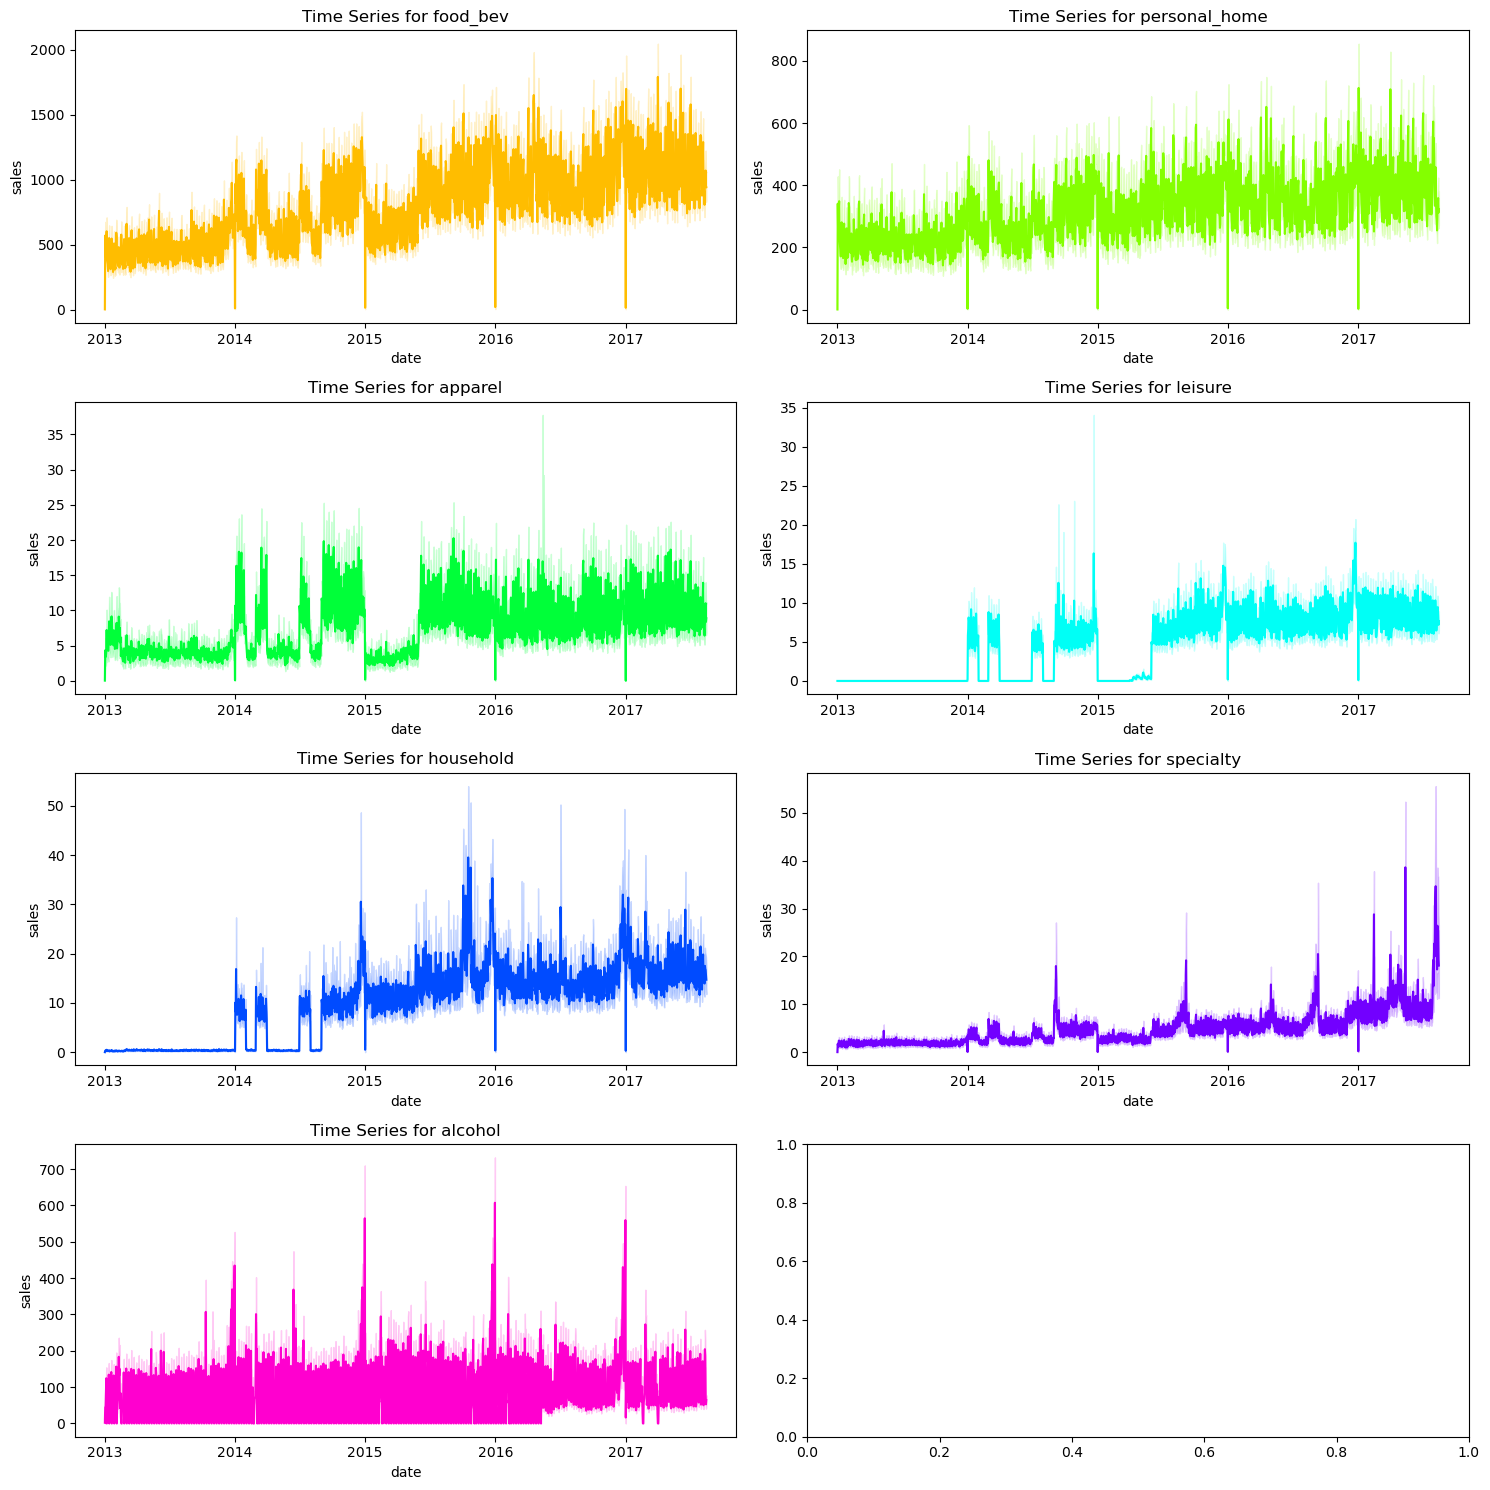

In [24]:
# List of categories
categories = ['food_bev', 'personal_home', 'apparel', 'leisure', 'household', 'specialty', 'alcohol']

# Create a figure and subplots
fig, axs = plt.subplots(4, 2, figsize=(15, 15)) 
axs = axs.flatten()  # Flatten the array for easy indexing

# Define a color palette
palette = sns.color_palette("hsv", len(categories))

# Loop through categories and create a subplot for each
for i, cat in enumerate(categories):
    sns.lineplot(
        data=combined_df[combined_df['sale_cat'] == cat], 
        x='date', 
        y='sales', 
        color=palette[i], 
        ax=axs[i]
    )
    axs[i].set_title(f'Time Series for {cat}')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


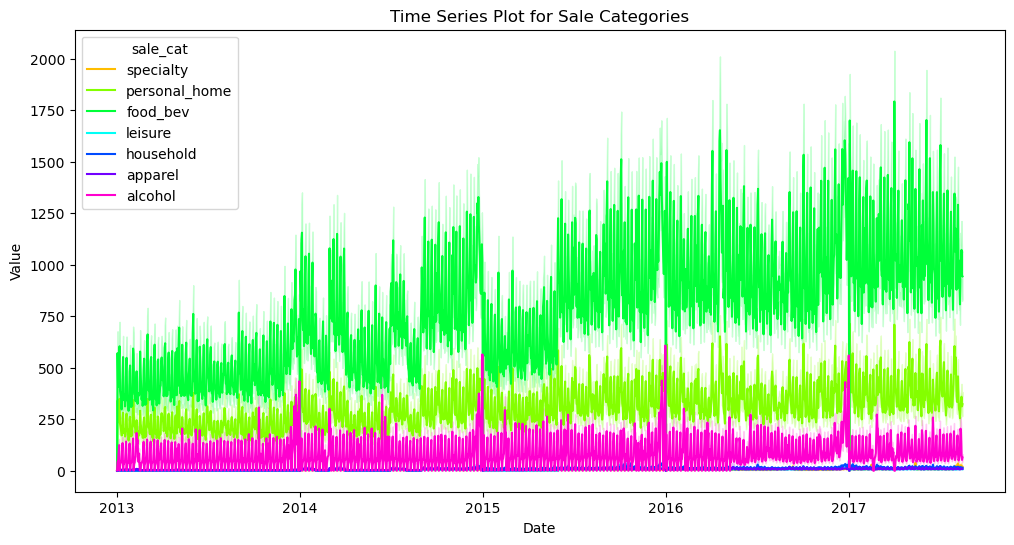

In [22]:
# Set the plot size
plt.figure(figsize=(12, 6))

# Create the time series plot
sns.lineplot(data=combined_df, x='date', y='sales', palette=palette)

# Add title and labels
plt.title('Time Series Plot for Sale Categories')
plt.xlabel('Date')
plt.ylabel('Value')

# Show the plot
plt.show()

## Visualizations

## Split Data Into Test and Train Set

In [23]:
print(f"Size of combined_df: {len(combined_df)}")

train_df = combined_df[combined_df['data_id'] == 'df1']
test_df = combined_df[combined_df['data_id'] == 'df2']

print(f"Size of train_df + test_df: {len(train_df) + len(test_df)}")


Size of combined_df: 3029400
Size of train_df + test_df: 3029400
